In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg

# Advection linéaire:
\begin{equation}
    \begin{cases}
    & \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0 \quad \text{pour} \quad t > 0, \quad x \in [l, L]\\
    & u(x,0)=u_0(x) \quad \forall x \in [l,L]
    \end{cases}
\end{equation}

In [20]:
#La Solution Iniciale:
def u0(x):
    if  x>=0.5 and x <= 1.5:
        return 1
    else: return 0

# Le flux Exacte:
def F(u,a):
    return a*u

# Les Flux des schemas:
def Rusanov(ug,ud,a,dx,dt):
    return 0.5*(F(ug,a)+F(ud,a))-a*(ud-ug)

def Rusanov2(ug,ud,a,dx,dt):
    return 0.5*(F(ug,a)+F(ud,a)-a*(ud-ug))

def Roe(ug,ud,a,dx,dt):
    if a >= 0:
        return F(ug,a)
    else:
        return F(ud,a)
    
def LF(ug,ud, a ,dx,dt):
    return 0.5*(F(ug,a)+F(ud,a)-(dx/(dt))*(ud-ug))
       
def LFM(ug,ud, a ,dx,dt):
    return 0.5*(F(ug,a)+F(ud,a)-0.5*(dx/(dt))*(ud-ug))
       
    
def LW(ug,ud, a, dx,dt):
    return 0.5*(F(ug,a)+F(ud,a)-(dt/dx)*(a**2)*(ud-ug))
       
def VFD(ug,ud, a, dx,dt):
    return F(ug,a)
       

In [21]:

def LinearAdvectionSolver(Flux, u0, T, l, L, a, N, CFL):
    
    dx = (L-l)/(N-1)
    X = np.linspace(l,L,N)
    
    dt=CFL*dx/a
    
    U0=np.array([u0(x) for x in X])

    Un = U0.copy()
    Unp1 = np.zeros(N)
    temps = 0
    while temps <= T:
        for i in range(1,N-1):
            Fd=Flux(Un[i],Un[i+1], a, dx, dt)
            Fg=Flux(Un[i-1],Un[i], a, dx, dt)
            Unp1[i]=Un[i]-dt/dx*(Fd-Fg)

        Unp1[0] = Unp1[1]
        Unp1[N-1] = Unp1[N-2]


        Un = Unp1.copy()
        temps += dt

    return Un
    

In [22]:
T=1.5
l=0
L=6
a=2
N=101
CFL=0.5
X = np.linspace(l,L,N)

Un_Roe = LinearAdvectionSolver(Roe, u0, T, l, L, a, N, CFL)
Un_Rsnv = LinearAdvectionSolver(Rusanov, u0, T, l, L, a, N, CFL)
Un_Rsnv2 = LinearAdvectionSolver(Rusanov2, u0, T, l, L, a, N, CFL)
Un_LF = LinearAdvectionSolver(LF, u0, T, l, L, a, N, CFL)
Un_LFM = LinearAdvectionSolver(LFM, u0, T, l, L, a, N, CFL)
Un_LW = LinearAdvectionSolver(LW, u0, T, l, L, a, N, CFL)
Un_VFD = LinearAdvectionSolver(VFD, u0, T, l, L, a, N, CFL)
UExact=np.array([u0(x-T*a) for x in X])


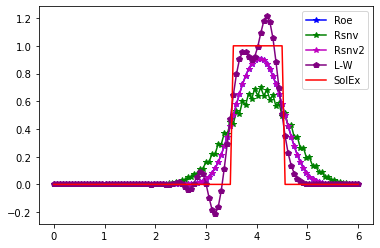

In [23]:
plt.plot(X, Un_Roe, '*-b', label='Roe')
plt.plot(X, Un_Rsnv, '*-g', label='Rsnv')
plt.plot(X, Un_Rsnv2, '*-m', label='Rsnv2')
plt.plot(X, Un_LF, '*-y', label='L-F')
plt.plot(X, Un_LFM, '*-c', label='L-F mod')
plt.plot(X, Un_VFD, '*-k', label='VFD')
plt.plot(X, Un_LW, linestyle='-', marker='p', color='purple', label='L-W')
plt.plot(X, UExact, '-r', label='SolEx')


######################
#plt.xlim([3, 5])  
#plt.ylim([-0.3, 1.5])  

plt.legend()
plt.pause(0.1)

In [60]:
e_Roe =  np.linalg.norm(UExact - Un_Roe,ord = 2) 
e_Rsnv =  np.linalg.norm(UExact - Un_Rsnv,ord = 2) 
e_Rsnv2 =  np.linalg.norm(UExact - Un_Rsnv2,ord = 2) 
e_LF =  np.linalg.norm(UExact - Un_LF,ord = 2) 
e_LFM =  np.linalg.norm(UExact - Un_LFM,ord = 2) 
e_VFD =  np.linalg.norm(UExact - Un_VFD,ord = 2) 
e_LW =  np.linalg.norm(UExact - Un_LW,ord = 2) 

print(f"L'erreur pour le schema de Roe: {e_Roe}")
print(f"L'erreur pour le schema volume fini decentré: {e_VFD}")
print(f"L'erreur pour le schema Rusanov2: {e_Rsnv2}")
print(f"L'erreur pour le schema Lax-Freiderichs modifie: {e_LFM}")
print(f"L'erreur pour le schema Rusanov: {e_Rsnv}")
print(f"L'erreur pour le schema Lax-Freiderichs: {e_LF}")
print(f"L'erreur pour le schema Lax-Wendroff: {e_LW}")


L'erreur pour le schema de Roe: 1.5531347987198678
L'erreur pour le schema volume fini decentré: 1.5531347987198678
L'erreur pour le schema Rusanov2: 1.553134798719868
L'erreur pour le schema Lax-Freiderichs modifie: 1.553134798719868
L'erreur pour le schema Rusanov: 2.1894872764584283
L'erreur pour le schema Lax-Freiderichs: 2.1894872764584283
L'erreur pour le schema Lax-Wendroff: 1.1550577336077092


# Advection non lineaire (Equation de Burgers):
\begin{equation}
    \begin{cases}
    & \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \quad \text{pour} \quad t > 0, \quad x \in [l, L]\\
    & u(x,0)=u_0(x) \quad \forall x \in [l,L]
    \end{cases}
\end{equation}

In [7]:


#La Solution Iniciale:
def u0(x):
    if  x <=l+ (L-l)/4:
        return ul
    if  x >l+ (L-l)/4 and x <l+ 3*(L-l)/4:
        return um
    else:
        return ur


# La Solution Exacte:
def Uex(t,x):
    if x>=l and x<=0.5*(L+l):
        if x-(l+ (L-l)/4)<= ul*t:
            return ul

        elif x-(l+ (L-l)/4)>ul*t and x-(l+ (L-l)/4)< um*t:
            return (x-(l+ (L-l)/4))/t

        elif x-(l+ (L-l)/4)>=um*t:
            return um
    else:
        if x-(l+ 3*(L-l)/4)<0.5*(um+ur)*t:
            return um
        else:
            return ur

# Le flux Exacte:
def F(u):
    return (u**2)/2

# Les Flux des schemas:
def Rusanov(ug,ud,dx,dt):
    lamda= max(abs(ug),abs(ud))
    return 0.5*(F(ug)+F(ud))-lamda*(ud-ug)

def Rusanov2(ug,ud,dx,dt):
    lamda= max(abs(ug),abs(ud))
    return 0.5*(F(ug)+F(ud)-lamda*(ud-ug))

def Roe(ug,ud,dx,dt):
    return 0.5 *( (F(ug)+F(ud)) - (ug+ud)/2 *(ud-ug) )
            
def LF(ug,ud,dx,dt):
    return 0.5 *( (F(ug)+F(ud)) - (dx/dt) *(ud-ug) )

def LFM(ug,ud,dx,dt):
    return 0.5 *( (F(ug)+F(ud)) - 0.5*(dx/dt) *(ud-ug) )
            
                  
def VFD(ug,ud,dx,dt):
    return F(ug)
       

In [8]:
def NonLinearBurgerSolver(Flux, u0, T, l, L, N, CFL):
    
    dx = (L-l)/(N-1)
    X = np.linspace(l,L,N)
    
    
    U0=np.array([u0(x) for x in X])

    Un = U0.copy()
    Unp1 = np.zeros(N)
    temps = 0
    while temps <= T:
        dt = CFL*dx/max(abs(Un))
        for i in range(1,N-1):
            Fd = Flux(Un[i],Un[i+1],dx,dt)
            Fg = Flux(Un[i-1],Un[i],dx,dt)
            Unp1[i] = Un[i]-dt/dx*(Fd-Fg)

        Unp1[0] = Unp1[1]
        Unp1[N-1] = Unp1[N-2]


        Un = Unp1.copy()
        temps += dt

    return Un

In [9]:
ul = 0.2
um = 0.8
ur = 0.4
T=1/4
l=0
L=1
a=2
N=101
CFL=0.5
X = np.linspace(l,L,N)

U0=np.array([u0(x) for x in X])
Un_Roe = NonLinearBurgerSolver(Roe, u0, T, l, L, N, CFL)
Un_Rsnv = NonLinearBurgerSolver(Rusanov, u0, T, l, L, N, CFL)
Un_Rsnv2 = NonLinearBurgerSolver(Rusanov2, u0, T, l, L, N, CFL)
Un_LF = NonLinearBurgerSolver(LF, u0, T, l, L, N, CFL)
Un_LFM = NonLinearBurgerSolver(LFM, u0,T, l, L, N, CFL)
Un_VFD = NonLinearBurgerSolver(VFD, u0, T, l, L, N, CFL)
UExact=np.array([Uex(T,x) for x in X])


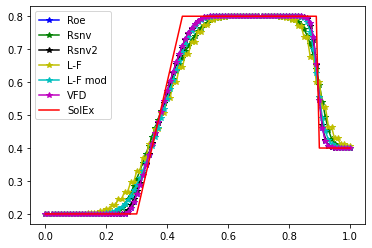

In [10]:

plt.plot(X, Un_Roe, '*-b', label='Roe')
plt.plot(X, Un_Rsnv, '*-g', label='Rsnv')
plt.plot(X, Un_Rsnv2, '*-k', label='Rsnv2')
plt.plot(X, Un_LF, '*-y', label='L-F')
plt.plot(X, Un_LFM, '*-c', label='L-F mod')
plt.plot(X, Un_VFD, '*-m', label='VFD')
plt.plot(X, UExact, '-r', label='SolEx')
#plt.plot(X, U0, '-b', label='u0')

plt.legend()
###### 1 ############
#plt.xlim([0.8, 1])  
#plt.ylim([0.2, 1.1])
###### 2 ############
#plt.xlim([0.3, 0.6])  
#plt.ylim([0.4, 0.85])
 

plt.show()

In [67]:
e_Roe =  np.linalg.norm(UExact - Un_Roe,ord = 2) 
e_Rsnv =  np.linalg.norm(UExact - Un_Rsnv,ord = 2) 
e_Rsnv2 =  np.linalg.norm(UExact - Un_Rsnv2,ord = 2) 
e_LF =  np.linalg.norm(UExact - Un_LF,ord = 2) 
e_LFM =  np.linalg.norm(UExact - Un_LFM,ord = 2) 
e_VFD =  np.linalg.norm(UExact - Un_VFD,ord = 2) 

print(f"L'erreur pour le schema de Roe: {e_Roe}")
print(f"L'erreur pour le schema volume fini decentré: {e_VFD}")
print(f"L'erreur pour le schema Rusanov: {e_Rsnv}")
print(f"L'erreur pour le schema Rusanov2: {e_Rsnv2}")
print(f"L'erreur pour le schema Lax-Freiderichs: {e_LF}")
print(f"L'erreur pour le schema Lax-Freiderichs modifie: {e_LFM}")


L'erreur pour le schema de Roe: 0.3033456949058768
L'erreur pour le schema volume fini decentré: 0.3033456949058769
L'erreur pour le schema Rusanov: 0.4964819236168388
L'erreur pour le schema Rusanov2: 0.3291190914302414
L'erreur pour le schema Lax-Freiderichs: 0.5911636587424347
L'erreur pour le schema Lax-Freiderichs modifie: 0.40443841244430656


### Cas d'un point sonique:

In [13]:
ul = -1
um = 1
ur = 0.4
T=1/8
l=0
L=1
a=2
N=101
CFL=0.5
X = np.linspace(l,L,N)

U0=np.array([u0(x) for x in X])
Un_Roe = NonLinearBurgerSolver(Roe, u0, T, l, L, N, CFL)
Un_Rsnv = NonLinearBurgerSolver(Rusanov, u0, T, l, L, N, CFL)
Un_Rsnv2 = NonLinearBurgerSolver(Rusanov2, u0, T, l, L, N, CFL)
Un_LF = NonLinearBurgerSolver(LF, u0, T, l, L, N, CFL)
Un_LFM = NonLinearBurgerSolver(LFM, u0,T, l, L, N, CFL)
Un_VFD = NonLinearBurgerSolver(VFD, u0, T, l, L, N, CFL)
UExact=np.array([Uex(T,x) for x in X])


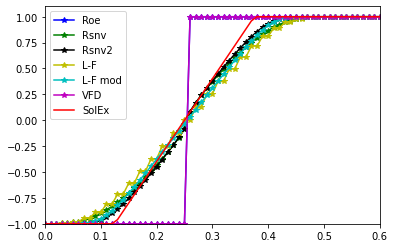

In [19]:
plt.plot(X, Un_Roe, '*-b', label='Roe')
plt.plot(X, Un_Rsnv, '*-g', label='Rsnv')
plt.plot(X, Un_Rsnv2, '*-k', label='Rsnv2')
plt.plot(X, Un_LF, '*-y', label='L-F')
plt.plot(X, Un_LFM, '*-c', label='L-F mod')
plt.plot(X, Un_VFD, '*-m', label='VFD')
plt.plot(X, UExact, '-r', label='SolEx')

#plt.plot(X, U0, '-b', label='u0')

plt.legend()
###### 1 ############
#plt.xlim([0.8, 1])  
#plt.ylim([0.2, 1.1])
###### 2 ############
plt.xlim([0, 0.6])  
plt.ylim([-1, 1.1])

plt.show()

In [70]:
ul = 0
um = 1
ur = -0.2
T=1/4
l=0
L=1
N=60
CFL=0.5
X = np.linspace(l,L,N)

U0=np.array([u0(x) for x in X])
Un_Roe = NonLinearBurgerSolver(Roe, u0, T, l, L, N, CFL)
Un_Rsnv = NonLinearBurgerSolver(Rusanov, u0, T, l, L, N, CFL)
Un_Rsnv2 = NonLinearBurgerSolver(Rusanov2, u0, T, l, L, N, CFL)
Un_LF = NonLinearBurgerSolver(LF, u0, T, l, L, N, CFL)
Un_LFM = NonLinearBurgerSolver(LFM, u0,T, l, L, N, CFL)
Un_VFD = NonLinearBurgerSolver(VFD, u0, T, l, L, N, CFL)
UExact=np.array([Uex(T,x) for x in X])


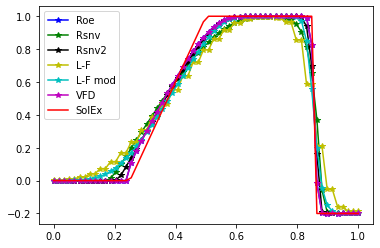

In [71]:

plt.plot(X, Un_Roe, '*-b', label='Roe')
plt.plot(X, Un_Rsnv, '*-g', label='Rsnv')
plt.plot(X, Un_Rsnv2, '*-k', label='Rsnv2')
plt.plot(X, Un_LF, '*-y', label='L-F')
plt.plot(X, Un_LFM, '*-c', label='L-F mod')
plt.plot(X, Un_VFD, '*-m', label='VFD')
plt.plot(X, UExact, '-r', label='SolEx')
#plt.plot(X, U0, '-b', label='u0')

plt.legend()
#plt.xlim([0.4, 1])  
#plt.ylim([0.3, 1.2])  

plt.show()